#  Обнаружение объектов

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html
* https://pyimagesearch.com/2021/11/01/training-an-object-detector-from-scratch-in-pytorch/
* https://pyimagesearch.com/2021/08/02/pytorch-object-detection-with-pre-trained-networks/

## Задачи для совместного разбора

1. Рассмотрите простейшую архитектуру для решения задачи object detection и процесс настройки модели.

In [ ]:
import torch as th
import torch.nn as nn

In [ ]:
imgs = th.rand(size=(16, 3, 100, 100))   # batch_size x rgb x размер изображения
bboxes = th.rand(size=(16, 4))   # ограничиваюшие рамки
labels = th.randint(0, 2, size=(16, ))   # метки классов
labels

tensor([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0])

In [ ]:
class Detector(nn.Module):
  def __init__(self):
    super().__init__()

    self.backbone = nn.Sequential(
        nn.Conv2d(3, 64, kernel_size=2),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    n_features = 64 * 49 * 49
    self.classifier = nn.Sequential(
        nn.Linear(n_features, 64),
        nn.ReLU(),
        nn.Linear(64, 2)
    )

    self.regressor = nn.Sequential(
        nn.Linear(n_features, 64),
        nn.ReLU(),
        nn.Linear(64, 4)
    )

  def forward(self, X):
    features = self.backbone(X).flatten(start_dim=1)
    return self.classifier(features), self.regressor(features)

In [ ]:
model = Detector()
label_pred, bbox_pred = model(imgs)

In [ ]:
import torch.nn.functional as F

In [ ]:
# F.cross_entropy(label_pred, labels)
F.mse_loss(bbox_pred, bboxes)

tensor(0.4412, grad_fn=<MseLossBackward0>)

In [ ]:
bbox_pred.shape

torch.Size([16, 4])

In [ ]:
bboxes.shape

torch.Size([16, 4])

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Напишите функцию `parse_xml`, которая читает xml-файл с разметкой изображения из архива `animals.zip` и возвращает словарь, содержащий три ключа:
```
{
        "raw": # словарь с ключами xmin, ymin, xmax, ymax
        "scaled": # словарь с ключами xmin, ymin, xmax, ymax
        "obj_name": # строка
}
```
В этом словаре `row` - абсолютные значения координат вершин bounding box, а `scaled` - относительные (нормированные на ширину и высоту изображения). Примените функцию к файлу `cat.0.xml` и выведите результат на экран.


- [ ] Проверено на семинаре

In [ ]:
from zipfile import ZipFile

zipfile = ZipFile("/content/drive/MyDrive/пм21_финашка/3 курс/Deep learning/06_cv/animals.zip", "r")
zipfile.extractall()

names = zipfile.namelist()  # все файлы
xml_names = list(filter(lambda x: '.xml' in x, names))   # только формат xml
jpg_names = list(filter(lambda x: '.jpg' in x, names))   # только формат jpg
xml_names[:5]

['Asirra: cat vs dogs/cat.0.xml',
 'Asirra: cat vs dogs/cat.1.xml',
 'Asirra: cat vs dogs/cat.10.xml',
 'Asirra: cat vs dogs/cat.11.xml',
 'Asirra: cat vs dogs/cat.12.xml']

In [ ]:
jpg_names[:5]

['Asirra: cat vs dogs/cat.0.jpg',
 'Asirra: cat vs dogs/cat.1.jpg',
 'Asirra: cat vs dogs/cat.10.jpg',
 'Asirra: cat vs dogs/cat.11.jpg',
 'Asirra: cat vs dogs/cat.12.jpg']

In [ ]:
  from PIL import Image
  Image.open('Asirra: cat vs dogs/cat.3960.jpg').size

(500, 407)

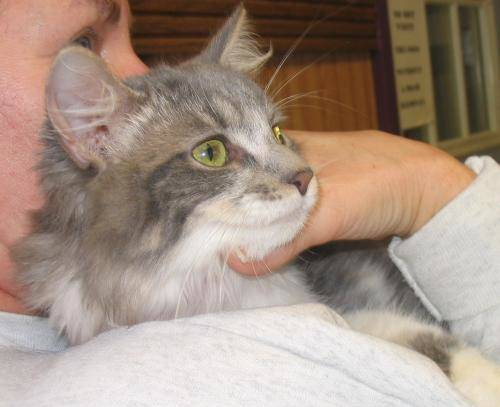

In [ ]:
Image.open('Asirra: cat vs dogs/cat.3960.jpg')

In [ ]:
from bs4 import BeautifulSoup

def parse_xml(xml_name):

  res_dict = {'row': {'xmin': [], 'ymin': [], 'xmax': [], 'ymax': []},
              'scaled': {'xmin': [], 'ymin': [], 'xmax': [], 'ymax': []},
              'obj_name': []}

  with open(xml_name, 'r') as f:
    soup = BeautifulSoup(f.read() , 'xml')

  res_dict['row']['xmin'] = float(soup.find_all('xmin')[0].text)
  res_dict['row']['ymin'] = float(soup.find_all('ymin')[0].text)
  res_dict['row']['xmax'] = float(soup.find_all('xmax')[0].text)
  res_dict['row']['ymax'] = float(soup.find_all('ymax')[0].text)

  res_dict['scaled']['xmin'] = float(soup.find_all('xmin')[0].text)/float(soup.find_all('width')[0].text)
  res_dict['scaled']['ymin'] = float(soup.find_all('ymin')[0].text)/float(soup.find_all('height')[0].text)
  res_dict['scaled']['xmax'] = float(soup.find_all('xmax')[0].text)/float(soup.find_all('width')[0].text)
  res_dict['scaled']['ymax'] = float(soup.find_all('ymax')[0].text)/float(soup.find_all('height')[0].text)

  res_dict['obj_name'] = soup.find_all('name')[0].text

  return res_dict


In [ ]:
xml_names[0]

'Asirra: cat vs dogs/cat.0.xml'

In [ ]:
parse_xml(xml_names[0])

{'row': {'xmin': 126.0, 'ymin': 83.0, 'xmax': 354.0, 'ymax': 243.0},
 'scaled': {'xmin': 0.252,
  'ymin': 0.22192513368983957,
  'xmax': 0.708,
  'ymax': 0.6497326203208557},
 'obj_name': 'cat'}

In [ ]:
parse_xml(xml_names[120])

{'row': {'xmin': 32.330021262168884,
  'ymin': 12.195963948965073,
  'xmax': 493.414044380188,
  'ymax': 215.18584156036377},
 'scaled': {'xmin': 0.06466004252433777,
  'ymin': 0.048589497804641724,
  'xmax': 0.986828088760376,
  'ymax': 0.8573141098022461},
 'obj_name': 'cat'}

<p class="task" id="2"></p>

2\. Опишите датасет `AnimalDetectionDataset` на основе архива `animals.zip`. Реализуйте `__getitem__` таким образом, чтобы он возвращал три элемента: тензор с изображением, словарь с координатами bounding box и метку объекта. Предусмотрите возможность передавать извне при создании датасета набор преобразований для изображений, преобразование для метки объекта (для кодирования) и флаг, показывающий, нужно ли возвращать исходные или нормированные координаты bounding box.

- [ ] Проверено на семинаре

In [ ]:
from torch.utils.data import Dataset
from torchvision import datasets, transforms

class AnimalDetectionDataset(Dataset):
    def __init__(self, root, transforms=None, target_transform = None, return_scaled=True):
        self.path = root

        zipfile = ZipFile(self.path, "r")
        zipfile.extractall()

        names = zipfile.namelist()  # все файлы
        self.xml_names = list(filter(lambda x: '.xml' in x, names))   # только формат xml
        self.jpg_names = list(filter(lambda x: '.jpg' in x, names))   # только формат jpg

        self.transforms = transforms   # набор преобразований для изображений
        self.target_transform = target_transform   # преобразование для метки объекта
        self.return_scaled = return_scaled   # флаг, показывающий, нужно ли возвращать исходные или нормированные координаты bounding box

    def __getitem__(self, idx):
      if type(idx) == int:
          idx = slice(idx, idx+1)

      xml = self.xml_names[idx]
      jpg = self.jpg_names[idx]

      jpgs = []
      for i in jpg:
        image = Image.open(i)
        if self.transforms is not None:
          jpgs.append(self.transforms(image))
        # else:
        #   jpgs.append(th.tensor(image))

      bounding_box = {'xmin':[], 'ymin':[], 'xmax': [], 'ymax': []}
      labels = []
      for i in xml:

        labels.append(parse_xml(i)['obj_name'])
        if self.return_scaled:  # возвращаем нормированные
          # bounding_box.append([parse_xml(i)['scaled']['xmin'], parse_xml(i)['scaled']['ymin'], parse_xml(i)['scaled']['xmax'], parse_xml(i)['scaled']['ymax']])
          bounding_box['xmin'] = parse_xml(i)['scaled']['xmin']
          bounding_box['ymin'] = parse_xml(i)['scaled']['ymin']
          bounding_box['xmax'] = parse_xml(i)['scaled']['xmax']
          bounding_box['ymax'] = parse_xml(i)['scaled']['ymax']
        else:
          # bounding_box.append([parse_xml(i)['row']['xmin'], parse_xml(i)['row']['ymin'], parse_xml(i)['row']['xmax'], parse_xml(i)['row']['ymax']])
          bounding_box['xmin'] = parse_xml(i)['row']['xmin']
          bounding_box['ymin'] = parse_xml(i)['row']['ymin']
          bounding_box['xmax'] = parse_xml(i)['row']['xmax']
          bounding_box['ymax'] = parse_xml(i)['row']['ymax']


      if self.target_transform is not None:
          labels = pd.Series(labels).map(self.target_transform).values   # преобразование меток классов


      return th.stack(jpgs), bounding_box, labels

    def __len__(self):
      return len(self.jpg_names)



In [1]:
import torchvision.transforms.v2 as T

In [ ]:
target_transform = {'cat': 0, 'dog' :1}

transform = T.Compose(
    [
      T.Resize((250, 250)),
      T.ToTensor(),
      T.Normalize(mean=(0, 0, 0), std=(1, 1, 1)),   # нормализация данных
    ]
)
transform

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


Compose(
      Resize(size=[250, 250], interpolation=InterpolationMode.BILINEAR, antialias=warn)
      ToTensor()
      Normalize(mean=[0, 0, 0], std=[1, 1, 1], inplace=False)
)

In [ ]:
import pandas as pd

AnimalDetectionDataset(
    '/content/drive/MyDrive/пм21_финашка/3 курс/Deep learning/06_cv/animals.zip',
    transforms = transform,
    target_transform= target_transform)[:3]

(tensor([[[[0.7961, 0.8039, 0.8157,  ..., 0.9569, 0.9490, 0.9373],
           [0.7961, 0.8039, 0.8157,  ..., 0.9569, 0.9490, 0.9412],
           [0.7961, 0.8039, 0.8157,  ..., 0.9608, 0.9490, 0.9412],
           ...,
           [0.6039, 0.6039, 0.6078,  ..., 0.0078, 0.0078, 0.0078],
           [0.6000, 0.6000, 0.6039,  ..., 0.0078, 0.0078, 0.0078],
           [0.5922, 0.5961, 0.6000,  ..., 0.0039, 0.0039, 0.0039]],
 
          [[0.6431, 0.6510, 0.6627,  ..., 0.7961, 0.7922, 0.7843],
           [0.6431, 0.6510, 0.6627,  ..., 0.8000, 0.7961, 0.7882],
           [0.6431, 0.6510, 0.6627,  ..., 0.8039, 0.7961, 0.7882],
           ...,
           [0.4824, 0.4824, 0.4863,  ..., 0.0078, 0.0078, 0.0078],
           [0.4784, 0.4784, 0.4824,  ..., 0.0078, 0.0078, 0.0078],
           [0.4706, 0.4745, 0.4784,  ..., 0.0039, 0.0039, 0.0039]],
 
          [[0.3412, 0.3490, 0.3608,  ..., 0.4706, 0.4784, 0.4745],
           [0.3412, 0.3490, 0.3608,  ..., 0.4745, 0.4824, 0.4784],
           [0.3412, 0.34

In [ ]:
AnimalDetectionDataset(
    '/content/drive/MyDrive/пм21_финашка/3 курс/Deep learning/06_cv/animals.zip',
    transforms = transform,
     return_scaled = False
    )[:2]

(tensor([[[[0.7961, 0.8039, 0.8157,  ..., 0.9569, 0.9490, 0.9373],
           [0.7961, 0.8039, 0.8157,  ..., 0.9569, 0.9490, 0.9412],
           [0.7961, 0.8039, 0.8157,  ..., 0.9608, 0.9490, 0.9412],
           ...,
           [0.6039, 0.6039, 0.6078,  ..., 0.0078, 0.0078, 0.0078],
           [0.6000, 0.6000, 0.6039,  ..., 0.0078, 0.0078, 0.0078],
           [0.5922, 0.5961, 0.6000,  ..., 0.0039, 0.0039, 0.0039]],
 
          [[0.6431, 0.6510, 0.6627,  ..., 0.7961, 0.7922, 0.7843],
           [0.6431, 0.6510, 0.6627,  ..., 0.8000, 0.7961, 0.7882],
           [0.6431, 0.6510, 0.6627,  ..., 0.8039, 0.7961, 0.7882],
           ...,
           [0.4824, 0.4824, 0.4863,  ..., 0.0078, 0.0078, 0.0078],
           [0.4784, 0.4784, 0.4824,  ..., 0.0078, 0.0078, 0.0078],
           [0.4706, 0.4745, 0.4784,  ..., 0.0039, 0.0039, 0.0039]],
 
          [[0.3412, 0.3490, 0.3608,  ..., 0.4706, 0.4784, 0.4745],
           [0.3412, 0.3490, 0.3608,  ..., 0.4745, 0.4824, 0.4784],
           [0.3412, 0.34

<p class="task" id="3"></p>

3\. Создайте объект класса `AnimalDetectionDataset` без применения преобразований и со значением `return_scaled=False`. Напишите функцию `show_image_with_bounding_box` для визуализации изображения с добавлением на него bounding box и подписи объекта. Продемонстрируйте работу функцию на изображении собаки и кошки.

- [ ] Проверено на семинаре

In [ ]:
transform = T.Compose(
    [
      T.ToTensor(),
      T.Normalize(mean=(0, 0, 0), std=(1, 1, 1)),   # нормализация данных
    ]
)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [ ]:
obj1 = AnimalDetectionDataset(
    '/content/drive/MyDrive/пм21_финашка/3 курс/Deep learning/06_cv/animals.zip',
    transforms = transform,
    # target_transform = target_transform,
     return_scaled = False
    )[14]

In [ ]:
obj1[0][0]

tensor([[[0.7333, 0.7059, 0.6902,  ..., 0.9412, 0.9725, 0.9961],
         [0.7255, 0.7098, 0.7059,  ..., 0.9412, 0.9686, 0.9922],
         [0.7255, 0.7137, 0.7176,  ..., 0.9529, 0.9686, 0.9804],
         ...,
         [0.2431, 0.2235, 0.2157,  ..., 0.8118, 0.7725, 0.7569],
         [0.2471, 0.2275, 0.2118,  ..., 0.8000, 0.7765, 0.7569],
         [0.2510, 0.2275, 0.2118,  ..., 0.7961, 0.7804, 0.7647]],

        [[0.5765, 0.5608, 0.5412,  ..., 0.9059, 0.9608, 1.0000],
         [0.5686, 0.5647, 0.5569,  ..., 0.9059, 0.9569, 0.9961],
         [0.5686, 0.5686, 0.5725,  ..., 0.9216, 0.9529, 0.9843],
         ...,
         [0.1294, 0.1176, 0.1020,  ..., 0.7961, 0.7647, 0.7412],
         [0.1333, 0.1137, 0.0980,  ..., 0.7922, 0.7686, 0.7490],
         [0.1373, 0.1137, 0.0980,  ..., 0.7882, 0.7725, 0.7569]],

        [[0.3725, 0.3569, 0.3490,  ..., 0.6510, 0.6980, 0.7333],
         [0.3647, 0.3608, 0.3647,  ..., 0.6510, 0.6941, 0.7294],
         [0.3647, 0.3608, 0.3686,  ..., 0.6745, 0.7020, 0.

In [ ]:
obj1[1]

{'xmin': 48.53288581967354,
 'ymin': 47.449732452631,
 'xmax': 401.6111468076706,
 'ymax': 496.6487191915512}

In [ ]:
obj1[2]

['cat']

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def show_image_with_bounding_box(obj):

  fig, ax = plt.subplots()
  ax.imshow(obj[0][0].permute(1,2,0))


  rectangle = Rectangle(
    [obj[1]['xmin'], obj[1]['ymin']],
     width = obj[1]['xmax'] - obj[1]['xmin'],
     height = obj[1]['ymax'] - obj[1]['ymin'],
    facecolor='none',
    edgecolor='r',
  )


  ax.add_patch(rectangle)   # Добавляем прямоугольник на оси
  fig.suptitle(obj[2][0])
  plt.show()



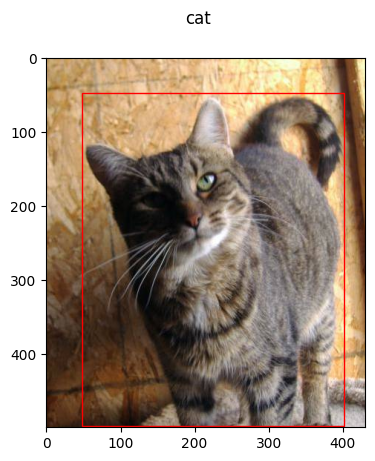

In [ ]:
show_image_with_bounding_box(obj1)

In [ ]:
obj2 = AnimalDetectionDataset(
    '/content/drive/MyDrive/пм21_финашка/3 курс/Deep learning/06_cv/animals.zip',
    transforms = transform,
    # target_transform = target_transform,
     return_scaled = False
    )[800]

In [ ]:
obj2[1]

{'xmin': 29.118812531232834,
 'ymin': 2.615621566772461,
 'xmax': 318.4113097190857,
 'ymax': 391.51691007614136}

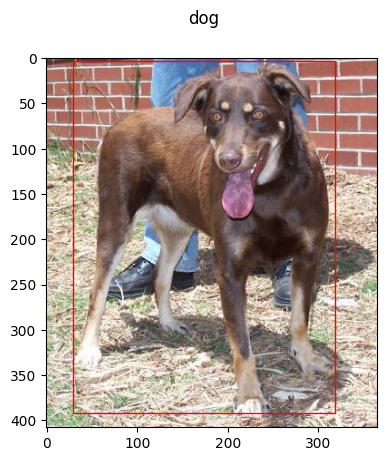

In [ ]:
show_image_with_bounding_box(obj2)

<p class="task" id="4"></p>

4\. Напишите модель для решения задачи выделения объектов. Реализуйте двухголовую сеть, одна голова которой предсказывает метку объекта (задача классификации), а вторая голова предсказывает 4 координаты вершин bounding box (задача регрессии). В качестве backbone используйте модель resnet50 из пакета `torchvision`.

- [ ] Проверено на семинаре

In [ ]:
from torchvision.models import resnet50

In [ ]:
resnet50()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
resnet50().fc.out_features

1000

In [ ]:
class Detector(nn.Module):
  def __init__(self):
    super().__init__()

    self.backbone = resnet50()

    n_features = self.backbone.fc.out_features
    self.classifier = nn.Sequential(
        nn.Linear(n_features, 64),
        nn.ReLU(),
        nn.Linear(64, 2)
    )

    self.regressor = nn.Sequential(
        nn.Linear(n_features, 64),
        nn.ReLU(),
        nn.Linear(64, 4)
    )

  def forward(self, X):
    features = self.backbone(X).flatten(start_dim=1)
    return self.classifier(features), self.regressor(features)

In [ ]:
model = Detector()

<p class="task" id="5"></p>

5\. Разбейте набор данных на обучающее и валидационное множество. Обучите модель, описанную в задаче 4. При создании датасета не забудьте указать преобразования, соответствующие модели ResNet.

Используйте сумму MSELoss (для расчета ошибки на задаче регрессии) и CrossEntropyLoss (для расчета ошибки на задачи классификации) для настройки весов модели. Для ускорения процесса обучения слои backbone можно заморозить. Во время обучения выводите на экран значения функции потерь на обучающем и валидационном множестве. Используя обученную модель, получите предсказания для изображения кошки и собаки и отрисуйте их. Выполните процедуру, обратную нормализации, чтобы корректно отобразить фотографии.

- [ ] Проверено на семинаре

In [ ]:
import torchvision.models as models

models.ResNet50_Weights.IMAGENET1K_V1.transforms()

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [ ]:
transform = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),   # Центральное обрезание изображения до размера 224x224
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [ ]:
dataset = AnimalDetectionDataset(
    '/content/drive/MyDrive/пм21_финашка/3 курс/Deep learning/06_cv/animals.zip',
    transforms = transform,
    target_transform = target_transform,
     return_scaled = True
    )

In [ ]:
from torch.utils.data import Dataset, DataLoader, random_split


train, test = random_split(
    dataset,
     [0.8, 0.2]
)

In [ ]:
train[0]

(tensor([[[[ 0.1768,  0.2282,  0.2967,  ...,  0.1939,  0.2796,  0.3994],
           [ 0.0741,  0.1426,  0.2282,  ...,  0.1768,  0.2796,  0.4166],
           [ 0.0398,  0.1083,  0.1939,  ...,  0.2624,  0.3481,  0.4337],
           ...,
           [ 0.2967,  0.2796,  0.2624,  ...,  1.2043,  1.2385,  1.2728],
           [ 0.2967,  0.2796,  0.2796,  ...,  1.1015,  1.1529,  1.1872],
           [ 0.2967,  0.2967,  0.2967,  ...,  1.0331,  1.0673,  1.0844]],
 
          [[ 0.4853,  0.5378,  0.6078,  ...,  0.4853,  0.5553,  0.6779],
           [ 0.3803,  0.4503,  0.5378,  ...,  0.4678,  0.5553,  0.6779],
           [ 0.3452,  0.4153,  0.5028,  ...,  0.5378,  0.5903,  0.6779],
           ...,
           [ 0.1877,  0.1702,  0.1527,  ...,  0.4153,  0.4503,  0.4853],
           [ 0.1877,  0.1702,  0.1702,  ...,  0.3102,  0.3627,  0.3978],
           [ 0.1877,  0.1877,  0.1877,  ...,  0.2402,  0.2927,  0.3277]],
 
          [[ 0.8622,  0.9145,  0.9842,  ...,  0.7751,  0.8274,  0.9319],
           [ 

In [ ]:
class Detector(nn.Module):
  def __init__(self):
    super().__init__()

    self.backbone = resnet50()
    for param in self.backbone.parameters():
        param.requires_grad = False

    n_features = self.backbone.fc.out_features
    self.classifier = nn.Sequential(
        nn.Linear(n_features, 64),
        nn.ReLU(),
        nn.Linear(64, 2)
    )

    self.regressor = nn.Sequential(
        nn.Linear(n_features, 64),
        nn.ReLU(),
        nn.Linear(64, 4)
    )

  def forward(self, X):
    features = self.backbone(X).flatten(start_dim=1)
    return self.classifier(features), self.regressor(features)




In [ ]:
model = Detector()
model

Detector(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
        

In [ ]:
train_loader = DataLoader(train, batch_size=64, shuffle = True)
test_loader = DataLoader(test, batch_size=64, shuffle = True)

In [ ]:
for img, box, lbl in train_loader:
  print(img.squeeze(1).shape, lbl.shape)   # batch_size x 1 x rgm x размер изображения
  break

torch.Size([64, 3, 224, 224]) torch.Size([64, 1])


In [ ]:
device = th.device("cuda" if th.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
model = model.to(device)

In [ ]:
import torch.optim as optim

criterion_regression = nn.MSELoss()
criterion_classification = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)
n_epochs = 10


for epoch in range(n_epochs):

  for img, box, lbl in train_loader:

    out_class, out_reg = model(img.squeeze(1).to(device))  # batch_size x 2, batch_size x 4

    loss_class = criterion_classification(out_class, lbl.to(device).squeeze(1))

    coords = th.stack([list(box.values())[0][0], list(box.values())[1][0], list(box.values())[2][0], list(box.values())[3][0]]).T.float().to(device)
    # print(out_reg.shape, coords.shape)
    loss_regr = criterion_regression(out_reg, coords)

    loss_train = loss_class + loss_regr
    loss_train.backward()
    optimizer.step()
    optimizer.zero_grad()


  print('\nTrain Loss -->', loss_train.item())
  print()


  for img, box, lbl in test_loader:

    out_class, out_reg = model(img.squeeze(1).to(device))  # batch_size x 2, batch_size x 4

    loss_class = criterion_classification(out_class, lbl.to(device).squeeze(1))

    coords = th.stack([list(box.values())[0][0], list(box.values())[1][0], list(box.values())[2][0], list(box.values())[3][0]]).T.float().to(device)
    # print(out_reg.shape, coords.shape)
    loss_regr = criterion_regression(out_reg, coords)

    loss_test = loss_class + loss_regr


  print('\nTest Loss -->', loss_test.item())
  print()



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, ta


Train Loss --> 0.7397012710571289



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, ta


Test Loss --> 0.7143888473510742



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, ta


Train Loss --> 0.7339122295379639



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, ta


Test Loss --> 0.7304396629333496



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, ta


Train Loss --> 0.7196937799453735



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, ta


Test Loss --> 0.703922688961029



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, ta


Train Loss --> 0.7336817979812622



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, ta


Test Loss --> 0.7636991143226624



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, ta


Train Loss --> 0.706519365310669



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, ta


Test Loss --> 0.7070848345756531



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, ta


Train Loss --> 0.7208227515220642



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, ta


Test Loss --> 0.7104684114456177



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, ta


Train Loss --> 0.7389624118804932



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, ta


Test Loss --> 0.7050164937973022



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, ta


Train Loss --> 0.709952175617218



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, ta


Test Loss --> 0.7002893090248108



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, ta


Train Loss --> 0.7184000015258789



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, ta


Test Loss --> 0.7094600796699524



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, ta


Train Loss --> 0.7041847705841064



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, ta


Test Loss --> 0.6980237364768982



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([28, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [ ]:
obj1

(tensor([[[[0.7333, 0.7059, 0.6902,  ..., 0.9412, 0.9725, 0.9961],
           [0.7255, 0.7098, 0.7059,  ..., 0.9412, 0.9686, 0.9922],
           [0.7255, 0.7137, 0.7176,  ..., 0.9529, 0.9686, 0.9804],
           ...,
           [0.2431, 0.2235, 0.2157,  ..., 0.8118, 0.7725, 0.7569],
           [0.2471, 0.2275, 0.2118,  ..., 0.8000, 0.7765, 0.7569],
           [0.2510, 0.2275, 0.2118,  ..., 0.7961, 0.7804, 0.7647]],
 
          [[0.5765, 0.5608, 0.5412,  ..., 0.9059, 0.9608, 1.0000],
           [0.5686, 0.5647, 0.5569,  ..., 0.9059, 0.9569, 0.9961],
           [0.5686, 0.5686, 0.5725,  ..., 0.9216, 0.9529, 0.9843],
           ...,
           [0.1294, 0.1176, 0.1020,  ..., 0.7961, 0.7647, 0.7412],
           [0.1333, 0.1137, 0.0980,  ..., 0.7922, 0.7686, 0.7490],
           [0.1373, 0.1137, 0.0980,  ..., 0.7882, 0.7725, 0.7569]],
 
          [[0.3725, 0.3569, 0.3490,  ..., 0.6510, 0.6980, 0.7333],
           [0.3647, 0.3608, 0.3647,  ..., 0.6510, 0.6941, 0.7294],
           [0.3647, 0.36

In [ ]:



obj = AnimalDetectionDataset(
    '/content/drive/MyDrive/пм21_финашка/3 курс/Deep learning/06_cv/animals.zip',
    transforms = transform,
    # target_transform = target_transform,
     return_scaled = True
    )[45]

obj

(tensor([[[[-0.6965, -0.6281, -0.6452,  ...,  0.3652,  0.3652,  0.3652],
           [-0.6109, -0.6623, -0.7308,  ...,  0.4337,  0.3823,  0.3652],
           [-0.5767, -0.6281, -0.6281,  ...,  0.4166,  0.3823,  0.3652],
           ...,
           [-0.0287, -0.0287,  0.0227,  ...,  0.0227,  0.0398, -0.0287],
           [-0.0116, -0.0116,  0.0569,  ...,  0.0056,  0.0398, -0.0287],
           [ 0.0056,  0.0056,  0.0741,  ..., -0.0801, -0.0458, -0.0116]],
 
          [[-1.3880, -1.3179, -1.3354,  ..., -0.0924, -0.0924, -0.0924],
           [-1.3004, -1.3529, -1.4230,  ..., -0.0224, -0.0749, -0.0924],
           [-1.2654, -1.3179, -1.3179,  ..., -0.0399, -0.0749, -0.0924],
           ...,
           [-0.5826, -0.5826, -0.5301,  ..., -0.4426, -0.4251, -0.4951],
           [-0.5651, -0.5651, -0.4951,  ..., -0.4601, -0.4251, -0.4951],
           [-0.5476, -0.5476, -0.4776,  ..., -0.5476, -0.5126, -0.4776]],
 
          [[-1.6127, -1.5430, -1.5604,  ..., -0.3578, -0.3578, -0.3578],
           [-

In [ ]:
img, box, lbl = obj
# img.shape

out = model(img.to(device))
out

(tensor([[-0.0106, -0.0028]], device='cuda:0', grad_fn=<AddmmBackward0>),
 tensor([[0.0763, 0.1199, 0.9390, 1.0503]], device='cuda:0',
        grad_fn=<AddmmBackward0>))

In [ ]:
lbl_pred = th.argmax(out[0])   # предсказанный класс
lbl_pred

tensor(1, device='cuda:0')

In [ ]:
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]

In [ ]:
img[0]

tensor([[[-0.6965, -0.6281, -0.6452,  ...,  0.3652,  0.3652,  0.3652],
         [-0.6109, -0.6623, -0.7308,  ...,  0.4337,  0.3823,  0.3652],
         [-0.5767, -0.6281, -0.6281,  ...,  0.4166,  0.3823,  0.3652],
         ...,
         [-0.0287, -0.0287,  0.0227,  ...,  0.0227,  0.0398, -0.0287],
         [-0.0116, -0.0116,  0.0569,  ...,  0.0056,  0.0398, -0.0287],
         [ 0.0056,  0.0056,  0.0741,  ..., -0.0801, -0.0458, -0.0116]],

        [[-1.3880, -1.3179, -1.3354,  ..., -0.0924, -0.0924, -0.0924],
         [-1.3004, -1.3529, -1.4230,  ..., -0.0224, -0.0749, -0.0924],
         [-1.2654, -1.3179, -1.3179,  ..., -0.0399, -0.0749, -0.0924],
         ...,
         [-0.5826, -0.5826, -0.5301,  ..., -0.4426, -0.4251, -0.4951],
         [-0.5651, -0.5651, -0.4951,  ..., -0.4601, -0.4251, -0.4951],
         [-0.5476, -0.5476, -0.4776,  ..., -0.5476, -0.5126, -0.4776]],

        [[-1.6127, -1.5430, -1.5604,  ..., -0.3578, -0.3578, -0.3578],
         [-1.5256, -1.5779, -1.6476,  ..., -0

In [ ]:
img[0].shape

torch.Size([3, 224, 224])

In [ ]:
for i in range(len(mean)):
  # print(img[0][i])
  # print(std[i])
  img_new = img[0]*std[i]+mean[i]

img_new.shape

torch.Size([3, 224, 224])

In [ ]:
img_new

tensor([[[0.2493, 0.2647, 0.2608,  ..., 0.4882, 0.4882, 0.4882],
         [0.2685, 0.2570, 0.2416,  ..., 0.5036, 0.4920, 0.4882],
         [0.2762, 0.2647, 0.2647,  ..., 0.4997, 0.4920, 0.4882],
         ...,
         [0.3995, 0.3995, 0.4111,  ..., 0.4111, 0.4150, 0.3995],
         [0.4034, 0.4034, 0.4188,  ..., 0.4073, 0.4150, 0.3995],
         [0.4073, 0.4073, 0.4227,  ..., 0.3880, 0.3957, 0.4034]],

        [[0.0937, 0.1095, 0.1055,  ..., 0.3852, 0.3852, 0.3852],
         [0.1134, 0.1016, 0.0858,  ..., 0.4010, 0.3891, 0.3852],
         [0.1213, 0.1095, 0.1095,  ..., 0.3970, 0.3891, 0.3852],
         ...,
         [0.2749, 0.2749, 0.2867,  ..., 0.3064, 0.3104, 0.2946],
         [0.2788, 0.2788, 0.2946,  ..., 0.3025, 0.3104, 0.2946],
         [0.2828, 0.2828, 0.2985,  ..., 0.2828, 0.2907, 0.2985]],

        [[0.0431, 0.0588, 0.0549,  ..., 0.3255, 0.3255, 0.3255],
         [0.0627, 0.0510, 0.0353,  ..., 0.3412, 0.3294, 0.3255],
         [0.0706, 0.0588, 0.0588,  ..., 0.3373, 0.3294, 0.

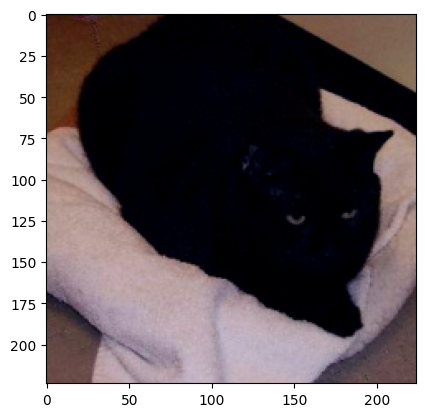

In [ ]:
plt.imshow(img_new.permute(1,2,0))

In [ ]:
coord = out[1][0].to(device)  # xmin, ymin, xmax, ymax
coord

tensor([0.0763, 0.1199, 0.9390, 1.0503], device='cuda:0',
       grad_fn=<SelectBackward0>)

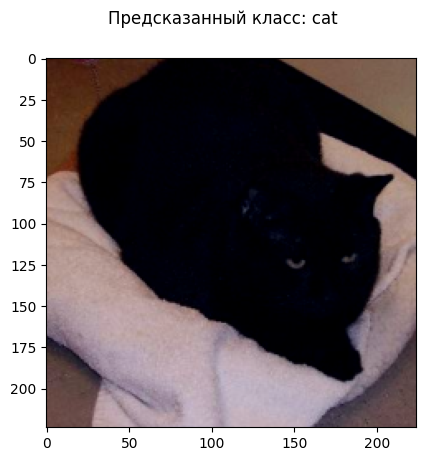

In [ ]:
fig, ax = plt.subplots()
ax.imshow(img_new.permute(1,2,0))

rectangle = Rectangle(
  [coord[0], coord[1]],
   width = coord[2] - coord[0],
   height = coord[3] - coord[1],
  facecolor='none',
  edgecolor='r',
)


# ax.add_patch(rectangle)   # Добавляем прямоугольник на оси
fig.suptitle(f'Предсказанный класс: {obj[2][0]}')
plt.show()

<p class="task" id="6"></p>

6\. Найдите в сети несколько изображений котов и собак. Используя любой инструмент для разметки (например, [CVAT](https://www.cvat.ai/)), выделите котов и собак на изображениях. Вставьте скриншот экспортированного файла с разметкой. Используя полученные изображения, визуализируйте разметку и bounding boxes, полученные при помощи модели.

- [ ] Проверено на семинаре

<p class="task" id="7"></p>

7*\. Повторите решение предыдущей задачи, используя модель `fasterrcnn_resnet50_fpn`. Замените слой для предсказания bounding box на `FastRCNNPredictor` с нужным количеством классов.

- [ ] Проверено на семинаре

## Обратная связь
- [ ] Хочу получить обратную связь по решению